In [215]:
import numpy as np
import pandas as pd 

# Import the data
df = pd.read_csv('/Users/elvisechefu/Desktop/language detection/languages.csv')
df.head(20)

,text,language
0,ich denke es handelt sich hier um ein missvers...,german
1,ich habe tom gerade erst verlassen,german
2,tom versuchte mary nur zu ärgern,german
3,tom hat mir die hand geküsst,german
4,ich wusste dass dir das gefiele,german
5,gehen sie mir aus dem weg,german
6,zieht eure schlafanzüge an,german
7,als kind war ich süchtig nach kriminalromanen,german
8,ich habe das auto mit zehn prozent rabatt gekauft,german
9,niemand anders könnte meine arbeit machen,german


DATA CLEANING

In [216]:
# Remove null values
df = df.dropna()


In [217]:
print(df['language'].head(4))  # Print the first N rows


0    german
1    german
2    german
3    german
Name: language, dtype: object


In [218]:
# Count the number of German sentences
n_german_sentences = df[df['language'] == 'german'].shape[0]

# Print the number of German sentences
print(n_german_sentences)

199618


In [219]:
# Count the number of English sentences
n_english_sentences = df[df['language'] == 'english'].shape[0]

# Print the number of English sentences
print(n_english_sentences)

275687


In [220]:
# Count the number of Spanish sentences
n_spanish_sentences = df[df['language'] == 'spanish'].shape[0]

# Print the number of Spanish sentences
print(n_spanish_sentences)

118686


In [221]:
# Count the number of French sentences
n_french_sentences = df[df['language'] == 'french'].shape[0]

# Print the number of French sentences
print(n_french_sentences)

169693


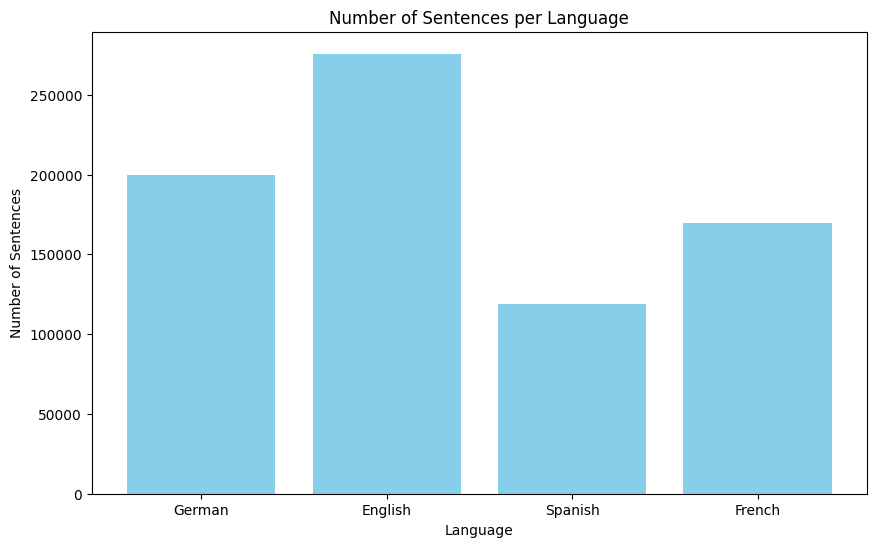

In [222]:
import matplotlib.pyplot as plt

# Define languages and their respective counts
languages = ['German', 'English', 'Spanish', 'French']
counts = [n_german_sentences, n_english_sentences, n_spanish_sentences, n_french_sentences]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(languages, counts, color='skyblue')
plt.xlabel('Language')
plt.ylabel('Number of Sentences')
plt.title('Number of Sentences per Language')
plt.show()

In [223]:
# Remove duplicates
df = df.drop_duplicates()

In [224]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the cleaned text data and transform it into TF-IDF features
X_tfidf = vectorizer.fit_transform(df)


In [225]:
#Text cleaning
import re

def clean_text(text):
    text = text.lower() #convert to lower case
    text = re.sub(r'[^a-zA-Z\s]', '', text) #Remove none Aphabetical characters
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [226]:
# Tokenization
from nltk.tokenize import word_tokenize

df['tokens'] = df['clean_text'].apply(word_tokenize)

In [227]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/elvisechefu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elvisechefu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [228]:
# Normalization 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

def normalize(tokens):
    normalized_tokens = [porter.stem(token) for token in tokens if token not in stop_words]
    return normalized_tokens

df['normalized_tokens'] = df['tokens'].apply(normalize)

In [229]:
# Display cleaned data
df.head(5)

,text,language,clean_text,tokens,normalized_tokens
0,ich denke es handelt sich hier um ein missvers...,german,ich denke es handelt sich hier um ein missvers...,"[ich, denke, es, handelt, sich, hier, um, ein,...","[ich, denk, es, handelt, sich, hier, um, ein, ..."
1,ich habe tom gerade erst verlassen,german,ich habe tom gerade erst verlassen,"[ich, habe, tom, gerade, erst, verlassen]","[ich, habe, tom, gerad, erst, verlassen]"
2,tom versuchte mary nur zu ärgern,german,tom versuchte mary nur zu rgern,"[tom, versuchte, mary, nur, zu, rgern]","[tom, versucht, mari, nur, zu, rgern]"
3,tom hat mir die hand geküsst,german,tom hat mir die hand geksst,"[tom, hat, mir, die, hand, geksst]","[tom, hat, mir, die, hand, geksst]"
4,ich wusste dass dir das gefiele,german,ich wusste dass dir das gefiele,"[ich, wusste, dass, dir, das, gefiele]","[ich, wusst, dass, dir, da, gefiel]"


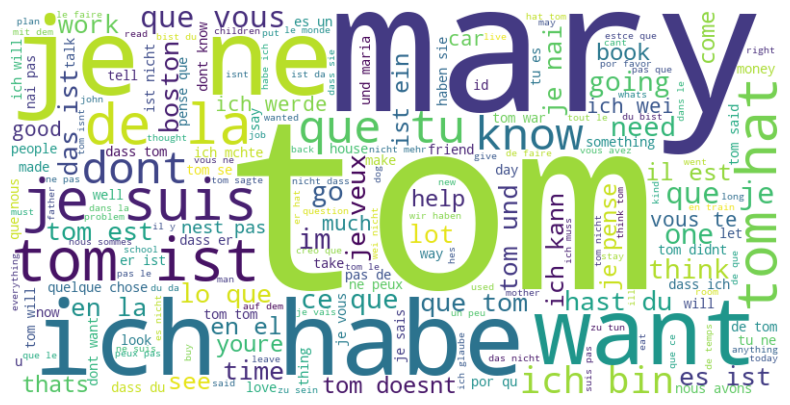

In [230]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
text = ' '.join(df['clean_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [231]:
# Save only the 'clean_text' column to a text file
df['clean_text'].to_csv('cleaned_txt.csv', index=False)
